In [ ]:
!pip install librosa pandas tqdm
!pip install torch torchvision scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import pandas as pd
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
from tqdm import tqdm
import gc
import glob
from torch.utils.data import Dataset


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
!wget https://os.unil.cloud.switch.ch/fma/fma_small.zip
!wget https://os.unil.cloud.switch.ch/fma/fma_metadata.zip

--2025-05-06 13:47:14--  https://os.unil.cloud.switch.ch/fma/fma_small.zip
Resolving os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)... 86.119.28.16, 2001:620:5ca1:201::214
Connecting to os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)|86.119.28.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7679594875 (7.2G) [application/zip]
Saving to: ‘fma_small.zip’

fma_small.zip       100%[===================>]   7.15G  20.1MB/s    in 5m 48s  

2025-05-06 13:53:03 (21.1 MB/s) - ‘fma_small.zip’ saved [7679594875/7679594875]

--2025-05-06 13:53:03--  https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
Resolving os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)... 86.119.28.16, 2001:620:5ca1:201::214
Connecting to os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)|86.119.28.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358412441 (342M) [application/zip]
Saving to: ‘fma_metadata.zip’

fma_metadata.zip    100%[===================>] 341.81

In [ ]:
!unzip fma_small.zip
!unzip fma_metadata.zip

Streaming output truncated to the last 5000 lines.
 bunzipping: fma_small/068/068844.mp3  
 bunzipping: fma_small/068/068851.mp3  
 bunzipping: fma_small/068/068852.mp3  
 bunzipping: fma_small/068/068853.mp3  
 bunzipping: fma_small/068/068854.mp3  
 bunzipping: fma_small/068/068860.mp3  
 bunzipping: fma_small/068/068861.mp3  
 bunzipping: fma_small/068/068862.mp3  
 bunzipping: fma_small/068/068869.mp3  
 bunzipping: fma_small/068/068872.mp3  
 bunzipping: fma_small/068/068875.mp3  
 bunzipping: fma_small/068/068891.mp3  
 bunzipping: fma_small/068/068892.mp3  
 bunzipping: fma_small/068/068893.mp3  
 bunzipping: fma_small/068/068894.mp3  
 bunzipping: fma_small/068/068895.mp3  
 bunzipping: fma_small/068/068896.mp3  
 bunzipping: fma_small/068/068897.mp3  
 bunzipping: fma_small/068/068898.mp3  
 bunzipping: fma_small/068/068899.mp3  
 bunzipping: fma_small/068/068909.mp3  
 bunzipping: fma_small/069/069001.mp3  
 bunzipping: fma_small/069/069002.mp3  
 bunzipping: fma_small/069/06

In [ ]:
tracks = pd.read_csv('/content/fma_metadata/tracks.csv', index_col=0, header=[0, 1])
genres = pd.read_csv('/content/fma_metadata/genres.csv', index_col=0)

In [ ]:
tracks.columns

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

In [ ]:
tracks[[('track','genres_all')]].head()

,track
,genres_all
track_id,
2,[21]
3,[21]
5,[21]
10,[10]
20,"[17, 10, 76, 103]"


In [ ]:
tracks[('track', 'genre_top')].value_counts()

,count
"(track, genre_top)",
Rock,14182
Experimental,10608
Electronic,9372
Hip-Hop,3552
Folk,2803
Pop,2332
Instrumental,2079
International,1389
Classical,1230


In [ ]:

def get_audio_path(track_id):
    tid_str = '{:06d}'.format(track_id)
    return os.path.join('fma_small', tid_str[:3], tid_str + '.mp3')


In [ ]:
track_id = 2
print(get_audio_path(track_id))

fma_small/000/000002.mp3


In [ ]:


path = get_audio_path(2)
y, sr = librosa.load(path, sr=None)
print(f"Audio shape: {y.shape}, Sample rate: {sr}")


Audio shape: (1321967,), Sample rate: 44100


In [ ]:
y, sr = librosa.load("fma_small/000/000005.mp3", sr=None)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_db = librosa.power_to_db(S, ref=np.max)


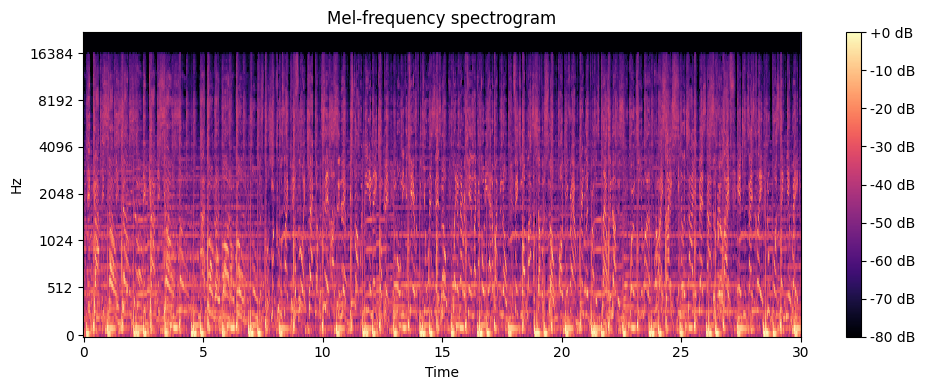

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

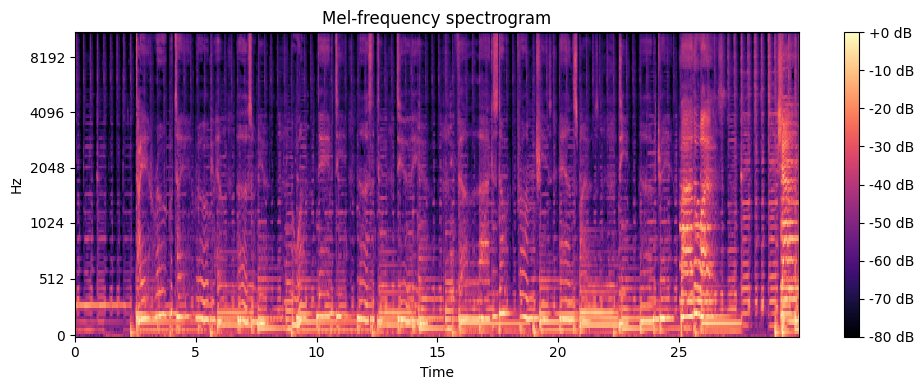

In [ ]:

path = get_audio_path(140)
y, sr = librosa.load(path, sr=22050)

# Audio
display(Audio(path))

# Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_db = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()


In [ ]:
'''import os
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

def get_audio_path(track_id, base_dir="fma_small"):
    tid_str = '{:06d}'.format(track_id)
    return os.path.join(base_dir, tid_str[:3], tid_str + '.mp3')

def save_spectrogram(y, sr, output_path, save_as="png"):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)

    if save_as == "npy":
        np.save(output_path, S_db)
    elif save_as == "png":
        plt.figure(figsize=(2.56, 2.56), dpi=100)
        plt.axis('off')
        librosa.display.specshow(S_db, sr=sr, x_axis=None, y_axis=None)
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
        plt.close()

def generate_all_spectrograms(metadata_csv='tracks.csv', audio_dir='fma_small',
                               output_dir='spectrograms', save_as='png', sr=None):
    # Load metadata
    tracks = pd.read_csv(metadata_csv, index_col=0, header=[0, 1])
    genre_series = tracks['track']['genre_top']

    # Iterate through all track IDs and genres
    for track_id, genre in tqdm(genre_series.items()):
        if pd.isna(genre):
            continue  # Skip if genre is NaN

        # Get path to audio file
        audio_path = get_audio_path(track_id, base_dir=audio_dir)

        # Check if file exists
        if not os.path.exists(audio_path):
            continue

        try:
            y, sr_actual = librosa.load(audio_path, sr=sr)

            # Create output path
            genre_folder = os.path.join(output_dir, genre)
            os.makedirs(genre_folder, exist_ok=True)

            ext = 'npy' if save_as == 'npy' else 'png'
            output_path = os.path.join(genre_folder, f"{track_id}.{ext}")

            # Skip if already processed
            if os.path.exists(output_path):
                continue

            # Save spectrogram
            save_spectrogram(y, sr_actual, output_path, save_as=save_as)

        except Exception as e:
            print(f"Error processing {track_id}: {e}")
'''

'import os\nimport librosa\nimport numpy as np\nimport librosa.display\nimport matplotlib.pyplot as plt\nimport pandas as pd\nfrom tqdm import tqdm\n\ndef get_audio_path(track_id, base_dir="fma_small"):\n    tid_str = \'{:06d}\'.format(track_id)\n    return os.path.join(base_dir, tid_str[:3], tid_str + \'.mp3\')\n\ndef save_spectrogram(y, sr, output_path, save_as="png"):\n    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)\n    S_db = librosa.power_to_db(S, ref=np.max)\n\n    if save_as == "npy":\n        np.save(output_path, S_db)\n    elif save_as == "png":\n        plt.figure(figsize=(2.56, 2.56), dpi=100)\n        plt.axis(\'off\')\n        librosa.display.specshow(S_db, sr=sr, x_axis=None, y_axis=None)\n        plt.savefig(output_path, bbox_inches=\'tight\', pad_inches=0)\n        plt.close()\n\ndef generate_all_spectrograms(metadata_csv=\'tracks.csv\', audio_dir=\'fma_small\',\n                               output_dir=\'spectrograms\', save_as=\'png\', sr=None):\n    

In [ ]:

# Get all track IDs that are actually in the folder
available_ids = set(
    int(os.path.splitext(os.path.basename(p))[0])
    for p in glob.glob('fma_small/*/*.mp3')
)


In [ ]:
def get_audio_path(track_id, base_dir="fma_small"):
    tid_str = '{:06d}'.format(track_id)
    return os.path.join(base_dir, tid_str[:3], tid_str + '.mp3')

def save_spectrogram_npy(y, sr, output_path, n_mels=128):
    try:
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        S_db = librosa.power_to_db(S, ref=np.max)
        np.save(output_path, S_db)
        del S, S_db
        gc.collect()
    except Exception as e:
        print(f"Error generating .npy for {output_path}: {e}")

def generate_spectrograms_npy(metadata_csv='tracks.csv', audio_dir='fma_small',
                               output_dir='spectrograms_npy', sr=22050, n_mels=128):
    # Load metadata
    tracks = pd.read_csv(metadata_csv, index_col=0, header=[0, 1])
    genre_series = tracks['track']['genre_top']

    # Only process track IDs that exist in fma_small
    available_ids = set(
        int(os.path.splitext(os.path.basename(p))[0])
        for p in glob.glob(os.path.join(audio_dir, '*/*.mp3'))
    )
    genre_series = genre_series[genre_series.index.isin(available_ids)]

    print(f"Processing {len(genre_series)} tracks...")

    for track_id, genre in tqdm(genre_series.items(), total=len(genre_series)):
        if pd.isna(genre):
            continue

        audio_path = get_audio_path(track_id, base_dir=audio_dir)
        if not os.path.exists(audio_path):
            continue

        try:
            y, sr_actual = librosa.load(audio_path, sr=sr)

            genre_folder = os.path.join(output_dir, genre)
            os.makedirs(genre_folder, exist_ok=True)

            output_path = os.path.join(genre_folder, f"{track_id}.npy")
            if os.path.exists(output_path):
                continue

            save_spectrogram_npy(y, sr_actual, output_path, n_mels=n_mels)

            del y, sr_actual
            gc.collect()

        except Exception as e:
            print(f"Failed to process track ID {track_id}: {e}")
            continue


In [ ]:
#to generate will take an hour
'''generate_spectrograms_npy(
    metadata_csv='/content/fma_metadata/tracks.csv',
    audio_dir='fma_small',
    output_dir='spectrograms_npy',
    sr=22050,
    n_mels=128
)
'''

"generate_spectrograms_npy(\n    metadata_csv='/content/fma_metadata/tracks.csv',\n    audio_dir='fma_small',\n    output_dir='spectrograms_npy',\n    sr=22050,\n    n_mels=128\n)\n"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

folder_path = '/content/drive/MyDrive/Colab Notebooks/spectrograms_npy.zip'

print("Exists:", os.path.exists(folder_path))


Exists: True


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/spectrograms_npy.zip" -d "/content/spectrograms_npy"


Streaming output truncated to the last 5000 lines.
  inflating: /content/spectrograms_npy/content/spectrograms_npy/Rock/114410.npy  
  inflating: /content/spectrograms_npy/content/spectrograms_npy/Rock/137605.npy  
  inflating: /content/spectrograms_npy/content/spectrograms_npy/Rock/108031.npy  
  inflating: /content/spectrograms_npy/content/spectrograms_npy/Rock/108290.npy  
  inflating: /content/spectrograms_npy/content/spectrograms_npy/Rock/117884.npy  
  inflating: /content/spectrograms_npy/content/spectrograms_npy/Rock/109349.npy  
  inflating: /content/spectrograms_npy/content/spectrograms_npy/Rock/145260.npy  
  inflating: /content/spectrograms_npy/content/spectrograms_npy/Rock/36481.npy  
  inflating: /content/spectrograms_npy/content/spectrograms_npy/Rock/117450.npy  
  inflating: /content/spectrograms_npy/content/spectrograms_npy/Rock/105119.npy  
  inflating: /content/spectrograms_npy/content/spectrograms_npy/Rock/135368.npy  
  inflating: /content/spectrograms_npy/content/s

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
import os
import numpy as np

def delete_corrupted_npy(folder='/content/spectrograms_npy/content/spectrograms_npy'):
    count = 0
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.npy'):
                path = os.path.join(root, file)
                try:
                    _ = np.load(path)
                except Exception as e:
                    print(f"Deleting corrupted file: {path} — {e}")
                    os.remove(path)
                    count += 1
    print(f"\n✅ Deleted {count} corrupted .npy files.")


In [ ]:
delete_corrupted_npy('spectrograms_npy')



✅ Deleted 0 corrupted .npy files.


# Splitting Data

In [ ]:
def split_dataset(base_dir='/content/spectrograms_npy/content/spectrograms_npy', output_dir='data', train_size=0.7, val_size=0.15, test_size=0.15, seed=42):
    genres = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    for genre in genres:
        files = [f for f in os.listdir(os.path.join(base_dir, genre)) if f.endswith('.npy')]

        # Skip empty genre folders
        if len(files) == 0:
            print(f"Skipping empty genre: {genre}")
            continue

        # Split files
        train, temp = train_test_split(files, train_size=train_size, random_state=seed)
        val, test = train_test_split(temp, test_size=test_size / (test_size + val_size), random_state=seed)

        for split_name, split_files in zip(['train', 'val', 'test'], [train, val, test]):
            split_genre_dir = os.path.join(output_dir, split_name, genre)
            os.makedirs(split_genre_dir, exist_ok=True)
            for f in split_files:
                src_path = os.path.join(base_dir, genre, f)
                dst_path = os.path.join(split_genre_dir, f)
                shutil.copy(src_path, dst_path)


# Model

In [ ]:
'''class SpectrogramDataset(Dataset):
    def __init__(self, root_dir, target_size=(128, 128)):
        self.root_dir = root_dir
        self.target_size = target_size
        self.samples = []
        self.class_to_idx = {cls: idx for idx, cls in enumerate(sorted(os.listdir(root_dir)))}
        for genre in os.listdir(root_dir):
            genre_path = os.path.join(root_dir, genre)
            for fname in os.listdir(genre_path):
                if fname.endswith('.npy'):
                    self.samples.append((os.path.join(genre_path, fname), self.class_to_idx[genre]))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
      path, label = self.samples[idx]
      spec = np.load(path)

    # If spectrogram height is not 128, skip or pad
      if spec.shape[0] != self.target_size[0]:
          # Pad or resize vertically (very rare, fallback)
          spec = self.fix_height(spec, self.target_size[0])

      spec = self.pad_or_crop(spec, self.target_size[1])  # Fix width
      spec = torch.tensor(spec, dtype=torch.float32).unsqueeze(0)  # (1, H, W)
      return spec, label

def fix_height(self, spec, target_height):
    H, W = spec.shape
    if H < target_height:
        pad_height = target_height - H
        spec = np.pad(spec, ((0, pad_height), (0, 0)), mode='constant')
    elif H > target_height:
        spec = spec[:target_height, :]
    return spec


    def pad_or_crop(self, spec, target_width):
        H, W = spec.shape
        if W < target_width:
            pad_width = target_width - W
            spec = np.pad(spec, ((0, 0), (0, pad_width)), mode='constant')
        elif W > target_width:
            spec = spec[:, :target_width]
        return spec
'''

"class SpectrogramDataset(Dataset):\n    def __init__(self, root_dir, target_size=(128, 128)):\n        self.root_dir = root_dir\n        self.target_size = target_size\n        self.samples = []\n        self.class_to_idx = {cls: idx for idx, cls in enumerate(sorted(os.listdir(root_dir)))}\n        for genre in os.listdir(root_dir):\n            genre_path = os.path.join(root_dir, genre)\n            for fname in os.listdir(genre_path):\n                if fname.endswith('.npy'):\n                    self.samples.append((os.path.join(genre_path, fname), self.class_to_idx[genre]))\n\n    def __len__(self):\n        return len(self.samples)\n\n    def __getitem__(self, idx):\n      path, label = self.samples[idx]\n      spec = np.load(path)\n\n    # If spectrogram height is not 128, skip or pad\n      if spec.shape[0] != self.target_size[0]:\n          # Pad or resize vertically (very rare, fallback)\n          spec = self.fix_height(spec, self.target_size[0])\n\n      spec = self.pad_o

In [ ]:
'''from torch.utils.data import Dataset
import os
import numpy as np
import torch

class SpectrogramDataset(Dataset):
    def __init__(self, root_dir, target_size=(128, 128)):
        self.root_dir = root_dir
        self.target_size = target_size
        self.samples = []
        self.class_to_idx = {cls: idx for idx, cls in enumerate(sorted(os.listdir(root_dir)))}
        for genre in os.listdir(root_dir):
            genre_path = os.path.join(root_dir, genre)
            for fname in os.listdir(genre_path):
                if fname.endswith('.npy'):
                    self.samples.append((os.path.join(genre_path, fname), self.class_to_idx[genre]))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        spec = np.load(path)

        # ✅ Only accept height 128
        if spec.shape[0] != self.target_size[0]:
            return self.__getitem__((idx + 1) % len(self.samples))  # skip and move to next

        # ✅ Pad or crop width to 128
        spec = self.pad_or_crop(spec, self.target_size[1])

        # Add channel dim: [1, 128, 128]
        spec = torch.tensor(spec, dtype=torch.float32).unsqueeze(0)
        return spec, label

    def pad_or_crop(self, spec, target_width):
        H, W = spec.shape
        if W < target_width:
            pad_width = target_width - W
            spec = np.pad(spec, ((0, 0), (0, pad_width)), mode='constant')
        elif W > target_width:
            spec = spec[:, :target_width]
        return spec
'''

"from torch.utils.data import Dataset\nimport os\nimport numpy as np\nimport torch\n\nclass SpectrogramDataset(Dataset):\n    def __init__(self, root_dir, target_size=(128, 128)):\n        self.root_dir = root_dir\n        self.target_size = target_size\n        self.samples = []\n        self.class_to_idx = {cls: idx for idx, cls in enumerate(sorted(os.listdir(root_dir)))}\n        for genre in os.listdir(root_dir):\n            genre_path = os.path.join(root_dir, genre)\n            for fname in os.listdir(genre_path):\n                if fname.endswith('.npy'):\n                    self.samples.append((os.path.join(genre_path, fname), self.class_to_idx[genre]))\n\n    def __len__(self):\n        return len(self.samples)\n\n    def __getitem__(self, idx):\n        path, label = self.samples[idx]\n        spec = np.load(path)\n\n        # ✅ Only accept height 128\n        if spec.shape[0] != self.target_size[0]:\n            return self.__getitem__((idx + 1) % len(self.samples))  # sk

In [ ]:
'''from torch.utils.data import Dataset
import os
import numpy as np
import torch

class SpectrogramDataset(Dataset):
    def __init__(self, root_dir, target_size=(128, 128)):
        self.root_dir = root_dir
        self.target_size = target_size  # (height, width)
        self.samples = []
        self.class_to_idx = {cls: idx for idx, cls in enumerate(sorted(os.listdir(root_dir)))}

        for genre in os.listdir(root_dir):
            genre_path = os.path.join(root_dir, genre)
            if not os.path.isdir(genre_path):
                continue
            for fname in os.listdir(genre_path):
                if fname.endswith('.npy'):
                    self.samples.append((os.path.join(genre_path, fname), self.class_to_idx[genre]))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        try:
            spec = np.load(path)
        except Exception as e:
            print(f"Skipping corrupted file: {path} — {e}")
            return self.__getitem__((idx + 1) % len(self.samples))

        # Ensure correct height
        if spec.shape[0] != self.target_size[0]:
            print(f"Skipping file with incorrect height: {path} — shape {spec.shape}")
            return self.__getitem__((idx + 1) % len(self.samples))

        # Pad or crop width to target
        spec = self.pad_or_crop(spec, self.target_size[1])

        # Return tensor with channel dimension
        spec = torch.tensor(spec, dtype=torch.float32).unsqueeze(0)  # [1, H, W]
        return spec, label

    def pad_or_crop(self, spec, target_width):
        H, W = spec.shape
        if W < target_width:
            pad_width = target_width - W
            spec = np.pad(spec, ((0, 0), (0, pad_width)), mode='constant')
        elif W > target_width:
            spec = spec[:, :target_width]
        return spec
'''

'from torch.utils.data import Dataset\nimport os\nimport numpy as np\nimport torch\n\nclass SpectrogramDataset(Dataset):\n    def __init__(self, root_dir, target_size=(128, 128)):\n        self.root_dir = root_dir\n        self.target_size = target_size  # (height, width)\n        self.samples = []\n        self.class_to_idx = {cls: idx for idx, cls in enumerate(sorted(os.listdir(root_dir)))}\n\n        for genre in os.listdir(root_dir):\n            genre_path = os.path.join(root_dir, genre)\n            if not os.path.isdir(genre_path):\n                continue\n            for fname in os.listdir(genre_path):\n                if fname.endswith(\'.npy\'):\n                    self.samples.append((os.path.join(genre_path, fname), self.class_to_idx[genre]))\n\n    def __len__(self):\n        return len(self.samples)\n\n    def __getitem__(self, idx):\n        path, label = self.samples[idx]\n        try:\n            spec = np.load(path)\n        except Exception as e:\n            pr

In [ ]:
'''import os
import numpy as np
import torch
from torch.utils.data import Dataset

class SpectrogramDataset(Dataset):
    def __init__(self, root_dir, target_size=(128, 128)):
        self.root_dir = root_dir
        self.target_size = target_size  # (height, width)
        self.samples = []
        self.class_to_idx = {cls: idx for idx, cls in enumerate(sorted(os.listdir(root_dir)))}

        for genre in os.listdir(root_dir):
            genre_path = os.path.join(root_dir, genre)
            if not os.path.isdir(genre_path):
                continue
            for fname in os.listdir(genre_path):
                if fname.endswith('.npy'):
                    self.samples.append((os.path.join(genre_path, fname), self.class_to_idx[genre]))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        try:
            spec = np.load(path)
        except Exception as e:
            print(f"Skipping corrupted file: {path} — {e}")
            return self.__getitem__((idx + 1) % len(self.samples))

        # 🛠 Fix height (pad if needed)
        if spec.shape[0] != self.target_size[0]:
            spec = self.fix_height(spec, self.target_size[0])

        # 🛠 Fix width (pad/crop to 128)
        spec = self.pad_or_crop(spec, self.target_size[1])

        # Convert to tensor and add channel dimension: [1, H, W]
        spec = torch.tensor(spec, dtype=torch.float32).unsqueeze(0)
        return spec, label

    def fix_height(self, spec, target_height):
        H, W = spec.shape
        if H < target_height:
            pad = target_height - H
            spec = np.pad(spec, ((0, pad), (0, 0)), mode='constant')
        elif H > target_height:
            spec = spec[:target_height, :]
        return spec

    def pad_or_crop(self, spec, target_width):
        H, W = spec.shape
        if W < target_width:
            pad_width = target_width - W
            spec = np.pad(spec, ((0, 0), (0, pad_width)), mode='constant')
        elif W > target_width:
            spec = spec[:, :target_width]
        return spec
'''

'import os\nimport numpy as np\nimport torch\nfrom torch.utils.data import Dataset\n\nclass SpectrogramDataset(Dataset):\n    def __init__(self, root_dir, target_size=(128, 128)):\n        self.root_dir = root_dir\n        self.target_size = target_size  # (height, width)\n        self.samples = []\n        self.class_to_idx = {cls: idx for idx, cls in enumerate(sorted(os.listdir(root_dir)))}\n\n        for genre in os.listdir(root_dir):\n            genre_path = os.path.join(root_dir, genre)\n            if not os.path.isdir(genre_path):\n                continue\n            for fname in os.listdir(genre_path):\n                if fname.endswith(\'.npy\'):\n                    self.samples.append((os.path.join(genre_path, fname), self.class_to_idx[genre]))\n\n    def __len__(self):\n        return len(self.samples)\n\n    def __getitem__(self, idx):\n        path, label = self.samples[idx]\n        try:\n            spec = np.load(path)\n        except Exception as e:\n            pr

In [ ]:
'''import os
import numpy as np
import torch
from torch.utils.data import Dataset

class SpectrogramDataset(Dataset):
    def __init__(self, root_dir, target_size=(128, 128)):
        self.root_dir = root_dir
        self.target_size = target_size  # (height, width)
        self.samples = []
        self.class_to_idx = {cls: idx for idx, cls in enumerate(sorted(os.listdir(root_dir)))}

        for genre in os.listdir(root_dir):
            genre_path = os.path.join(root_dir, genre)
            if not os.path.isdir(genre_path):
                continue
            for fname in os.listdir(genre_path):
                if fname.endswith('.npy'):
                    self.samples.append((os.path.join(genre_path, fname), self.class_to_idx[genre]))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        try:
            spec = np.load(path)
        except Exception as e:
            print(f"Skipping corrupted file: {path} — {e}")
            return self.__getitem__((idx + 1) % len(self.samples))

        # Fix height if needed (pad from 64 to 128 or crop if >128)
        if spec.shape[0] != self.target_size[0]:
            spec = self.fix_height(spec, self.target_size[0])

        # Pad or crop width to target
        spec = self.pad_or_crop(spec, self.target_size[1])

        # ✅ Normalize: zero mean, unit variance
        spec = (spec - spec.mean()) / (spec.std() + 1e-8)

        # Convert to tensor and add channel dimension: [1, H, W]
        spec = torch.tensor(spec, dtype=torch.float32).unsqueeze(0)
        return spec, label

    def fix_height(self, spec, target_height):
        H, W = spec.shape
        if H < target_height:
            pad = target_height - H
            spec = np.pad(spec, ((0, pad), (0, 0)), mode='constant')
        elif H > target_height:
            spec = spec[:target_height, :]
        return spec

    def pad_or_crop(self, spec, target_width):
        H, W = spec.shape
        if W < target_width:
            pad_width = target_width - W
            spec = np.pad(spec, ((0, 0), (0, pad_width)), mode='constant')
        elif W > target_width:
            spec = spec[:, :target_width]
        return spec
'''

'import os\nimport numpy as np\nimport torch\nfrom torch.utils.data import Dataset\n\nclass SpectrogramDataset(Dataset):\n    def __init__(self, root_dir, target_size=(128, 128)):\n        self.root_dir = root_dir\n        self.target_size = target_size  # (height, width)\n        self.samples = []\n        self.class_to_idx = {cls: idx for idx, cls in enumerate(sorted(os.listdir(root_dir)))}\n\n        for genre in os.listdir(root_dir):\n            genre_path = os.path.join(root_dir, genre)\n            if not os.path.isdir(genre_path):\n                continue\n            for fname in os.listdir(genre_path):\n                if fname.endswith(\'.npy\'):\n                    self.samples.append((os.path.join(genre_path, fname), self.class_to_idx[genre]))\n\n    def __len__(self):\n        return len(self.samples)\n\n    def __getitem__(self, idx):\n        path, label = self.samples[idx]\n        try:\n            spec = np.load(path)\n        except Exception as e:\n            pr

In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np
import os
import torchaudio.transforms as T
import torch.nn.functional as F

class SpectrogramDataset(Dataset):
    def __init__(self, root_dir, target_shape=(128, 128), augment=False):
        self.root_dir = root_dir
        self.samples = []
        self.target_shape = target_shape
        self.augment = augment

        # Collect all .npy paths
        for genre in os.listdir(root_dir):
            genre_path = os.path.join(root_dir, genre)
            if not os.path.isdir(genre_path): continue
            for fname in os.listdir(genre_path):
                if fname.endswith('.npy'):
                    path = os.path.join(genre_path, fname)
                    self.samples.append((path, genre))

        # Label mapping
        self.genres = sorted(list(set(label for _, label in self.samples)))
        self.class_to_idx = {genre: i for i, genre in enumerate(self.genres)}

        # Augmentation
        if self.augment:
            self.augment_fn = torch.nn.Sequential(
                T.FrequencyMasking(freq_mask_param=15),
                T.TimeMasking(time_mask_param=30)
            )
        else:
            self.augment_fn = None

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, genre = self.samples[idx]
        spec = np.load(path)

        # Normalize to [0, 1]
        spec = (spec - np.min(spec)) / (np.max(spec) - np.min(spec) + 1e-6)
        spec = torch.tensor(spec, dtype=torch.float32).unsqueeze(0)  # shape: [1, H, W]

        # Resize to target_shape using interpolation
        spec = F.interpolate(spec.unsqueeze(0), size=self.target_shape, mode='bilinear', align_corners=False).squeeze(0)

        # Optional augmentation
        if self.augment_fn:
            spec = self.augment_fn(spec)

        label = self.class_to_idx[genre]
        return spec, label


# CNN

In [ ]:
'''import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)

        self.dropout = nn.Dropout(0.3)  # <-- Add dropout here
        self.fc1 = nn.Linear(32 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))   # [B, 16, 64, 64]
        x = self.pool(F.relu(self.conv2(x)))   # [B, 32, 32, 32]
        x = x.view(-1, 32 * 32 * 32)
        x = self.dropout(F.relu(self.fc1(x)))  # Apply dropout after FC1
        x = self.fc2(x)
        return x'''

'import torch.nn as nn\nimport torch.nn.functional as F\n\nclass SimpleCNN(nn.Module):\n    def __init__(self, num_classes):\n        super(SimpleCNN, self).__init__()\n        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)\n        self.pool = nn.MaxPool2d(2, 2)\n        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)\n\n        self.dropout = nn.Dropout(0.3)  # <-- Add dropout here\n        self.fc1 = nn.Linear(32 * 32 * 32, 128)\n        self.fc2 = nn.Linear(128, num_classes)\n\n    def forward(self, x):\n        x = self.pool(F.relu(self.conv1(x)))   # [B, 16, 64, 64]\n        x = self.pool(F.relu(self.conv2(x)))   # [B, 32, 32, 32]\n        x = x.view(-1, 32 * 32 * 32)\n        x = self.dropout(F.relu(self.fc1(x)))  # Apply dropout after FC1\n        x = self.fc2(x)\n        return x'

In [ ]:
#uncomment
'''class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # new layer
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)

        # Adjust input size to fc1: 64 * 16 * 16
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [B, 16, 64, 64]
        x = self.pool(F.relu(self.conv2(x)))  # [B, 32, 32, 32]
        x = self.pool(F.relu(self.conv3(x)))  # [B, 64, 16, 16]
        x = x.view(-1, 64 * 16 * 16)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x
'''

'class SimpleCNN(nn.Module):\n    def __init__(self, num_classes):\n        super(SimpleCNN, self).__init__()\n        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)\n        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)\n        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # new layer\n        self.pool = nn.MaxPool2d(2, 2)\n        self.dropout = nn.Dropout(0.3)\n\n        # Adjust input size to fc1: 64 * 16 * 16\n        self.fc1 = nn.Linear(64 * 16 * 16, 128)\n        self.fc2 = nn.Linear(128, num_classes)\n\n    def forward(self, x):\n        x = self.pool(F.relu(self.conv1(x)))  # [B, 16, 64, 64]\n        x = self.pool(F.relu(self.conv2(x)))  # [B, 32, 32, 32]\n        x = self.pool(F.relu(self.conv3(x)))  # [B, 64, 16, 16]\n        x = x.view(-1, 64 * 16 * 16)\n        x = self.dropout(F.relu(self.fc1(x)))\n        x = self.fc2(x)\n        return x\n'

# Training Loop

In [ ]:
'''def train_model(model, train_loader, val_loader, device, epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    model.to(device)

    for epoch in range(epochs):
        model.train()
        total_loss, total_correct = 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_correct += (outputs.argmax(1) == labels).sum().item()

        val_acc = evaluate(model, val_loader, device)
        print(f"Epoch {epoch+1}: Train Loss={total_loss:.4f}, Train Acc={total_correct/len(train_loader.dataset):.4f}, Val Acc={val_acc:.4f}")

def evaluate(model, loader, device):
    model.eval()
    correct = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            correct += (outputs.argmax(1) == labels).sum().item()
    return correct / len(loader.dataset)'''

'def train_model(model, train_loader, val_loader, device, epochs=10):\n    criterion = nn.CrossEntropyLoss()\n    optimizer = optim.Adam(model.parameters(), lr=0.001)\n    model.to(device)\n\n    for epoch in range(epochs):\n        model.train()\n        total_loss, total_correct = 0, 0\n\n        for inputs, labels in train_loader:\n            inputs, labels = inputs.to(device), labels.to(device)\n            optimizer.zero_grad()\n            outputs = model(inputs)\n            loss = criterion(outputs, labels)\n            loss.backward()\n            optimizer.step()\n\n            total_loss += loss.item()\n            total_correct += (outputs.argmax(1) == labels).sum().item()\n\n        val_acc = evaluate(model, val_loader, device)\n        print(f"Epoch {epoch+1}: Train Loss={total_loss:.4f}, Train Acc={total_correct/len(train_loader.dataset):.4f}, Val Acc={val_acc:.4f}")\n\ndef evaluate(model, loader, device):\n    model.eval()\n    correct = 0\n    with torch.no_grad():\n 

In [ ]:
'''import torch
import torch.nn as nn

def evaluate(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

def train_model(model, train_loader, val_loader, device, epochs=20, lr=0.001):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    best_val_acc = 0.0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        scheduler.step()

        train_loss = running_loss / total
        train_acc = correct / total
        val_acc = evaluate(model, val_loader, device)

        # 🔍 Get current learning rate
        current_lr = optimizer.param_groups[0]['lr']

        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}, LR={current_lr:.6f}")

        # Optional: Save best model checkpoint
        # if val_acc > best_val_acc:
        #     best_val_acc = val_acc
        #     torch.save(model.state_dict(), "best_cnn_model.pth")

    print("Training complete.")
'''

'import torch\nimport torch.nn as nn\n\ndef evaluate(model, dataloader, device):\n    model.eval()\n    correct = 0\n    total = 0\n    with torch.no_grad():\n        for inputs, labels in dataloader:\n            inputs, labels = inputs.to(device), labels.to(device)\n            outputs = model(inputs)\n            _, predicted = torch.max(outputs, 1)\n            total += labels.size(0)\n            correct += (predicted == labels).sum().item()\n    return correct / total\n\ndef train_model(model, train_loader, val_loader, device, epochs=20, lr=0.001):\n    model = model.to(device)\n    criterion = nn.CrossEntropyLoss()\n    optimizer = torch.optim.Adam(model.parameters(), lr=lr)\n    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)\n\n    best_val_acc = 0.0\n\n    for epoch in range(epochs):\n        model.train()\n        running_loss = 0.0\n        correct = 0\n        total = 0\n\n        for inputs, labels in train_loader:\n            inputs, label

In [ ]:
#uncomment
'''import torch
import torch.nn as nn

def evaluate(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

def train_model(model, train_loader, val_loader, device, class_weights=None, epochs=20, lr=0.001):
    model = model.to(device)

    # 🔹 Use weighted loss if provided
    if class_weights is not None:
        criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
    else:
        criterion = nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    best_val_acc = 0.0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        scheduler.step()
        train_loss = running_loss / total
        train_acc = correct / total
        val_acc = evaluate(model, val_loader, device)

        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}, LR={current_lr:.6f}")

        # Optional: Save best model checkpoint
        # if val_acc > best_val_acc:
        #     best_val_acc = val_acc
        #     torch.save(model.state_dict(), "best_model.pth")

    print("✅ Training complete.")
'''

'import torch\nimport torch.nn as nn\n\ndef evaluate(model, dataloader, device):\n    model.eval()\n    correct = 0\n    total = 0\n    with torch.no_grad():\n        for inputs, labels in dataloader:\n            inputs, labels = inputs.to(device), labels.to(device)\n            outputs = model(inputs)\n            _, predicted = torch.max(outputs, 1)\n            total += labels.size(0)\n            correct += (predicted == labels).sum().item()\n    return correct / total\n\ndef train_model(model, train_loader, val_loader, device, class_weights=None, epochs=20, lr=0.001):\n    model = model.to(device)\n\n    # 🔹 Use weighted loss if provided\n    if class_weights is not None:\n        criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))\n    else:\n        criterion = nn.CrossEntropyLoss()\n\n    optimizer = torch.optim.Adam(model.parameters(), lr=lr)\n    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)\n\n    best_val_acc = 0.0\n\n    for e

# Evaluation

In [ ]:
'''def evaluate_on_test(model, test_loader, class_names, device):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = outputs.argmax(1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()'''

'def evaluate_on_test(model, test_loader, class_names, device):\n    model.eval()\n    y_true, y_pred = [], []\n\n    with torch.no_grad():\n        for inputs, labels in test_loader:\n            inputs, labels = inputs.to(device), labels.to(device)\n            outputs = model(inputs)\n            preds = outputs.argmax(1)\n            y_true.extend(labels.cpu().numpy())\n            y_pred.extend(preds.cpu().numpy())\n\n    print("\nClassification Report:")\n    print(classification_report(y_true, y_pred, target_names=class_names))\n\n    cm = confusion_matrix(y_true, y_pred)\n    plt.figure(figsize=(10, 8))\n    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)\n    plt.xlabel("Predicted")\n    plt.ylabel("True")\n    plt.title("Confusion Matrix")\n    plt.show()'

In [ ]:
#uncomment
'''from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_on_test(model, test_loader, class_names, device):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = outputs.argmax(1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # ✅ Print Test Accuracy
    test_accuracy = accuracy_score(y_true, y_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
'''

'from sklearn.metrics import classification_report, confusion_matrix, accuracy_score\n\ndef evaluate_on_test(model, test_loader, class_names, device):\n    model.eval()\n    y_true, y_pred = [], []\n\n    with torch.no_grad():\n        for inputs, labels in test_loader:\n            inputs, labels = inputs.to(device), labels.to(device)\n            outputs = model(inputs)\n            preds = outputs.argmax(1)\n            y_true.extend(labels.cpu().numpy())\n            y_pred.extend(preds.cpu().numpy())\n\n    # ✅ Print Test Accuracy\n    test_accuracy = accuracy_score(y_true, y_pred)\n    print(f"Test Accuracy: {test_accuracy:.4f}")\n\n    print("\nClassification Report:")\n    print(classification_report(y_true, y_pred, target_names=class_names))\n\n    cm = confusion_matrix(y_true, y_pred)\n    plt.figure(figsize=(10, 8))\n    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)\n    plt.xlabel("Predicted")\n    plt.ylabel("True")\n 

In [ ]:
split_dataset(base_dir='/content/spectrograms_npy/content/spectrograms_npy', output_dir='data')

In [ ]:
'''train_dataset = SpectrogramDataset('data/train', target_size=(128, 128))
val_dataset = SpectrogramDataset('data/val', target_size=(128, 128))
test_dataset = SpectrogramDataset('data/test', target_size=(128, 128))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
'''

"train_dataset = SpectrogramDataset('data/train', target_size=(128, 128))\nval_dataset = SpectrogramDataset('data/val', target_size=(128, 128))\ntest_dataset = SpectrogramDataset('data/test', target_size=(128, 128))\n\ntrain_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)\nval_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)\ntest_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)\n"

In [ ]:
train_dataset = SpectrogramDataset("data/train", target_shape=(128, 128), augment=True)
val_dataset = SpectrogramDataset("data/val", target_shape=(128, 128))
test_dataset = SpectrogramDataset("data/test", target_shape=(128, 128))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32)


In [ ]:
'''train_dataset = SpectrogramDataset('data/train')
val_dataset = SpectrogramDataset('data/val')

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
'''

"train_dataset = SpectrogramDataset('data/train')\nval_dataset = SpectrogramDataset('data/val')\n\ntrain_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)\nval_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)\n"

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

#Compute class weights from training data
train_labels = [label for _, label in train_dataset.samples]
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float)

#model = SimpleCNN(num_classes=len(train_dataset.class_to_idx))
#train_model(model, train_loader, val_loader, device, class_weights=class_weights, epochs=20)


In [ ]:
'''model = SimpleCNN(num_classes=len(train_dataset.class_to_idx))
train_model(model, train_loader, val_loader, device, epochs=20)'''


In [ ]:
#from sklearn.metrics import classification_report, confusion_matrix # Import necessary functions
#import seaborn as sns # Import seaborn


In [ ]:
class_names = list(test_dataset.class_to_idx.keys())
#evaluate_on_test(model, test_loader, class_names, device)

In [ ]:
import os
import numpy as np
from collections import Counter

def get_spectrogram_shapes(base_dir='/content/spectrograms_npy/content/spectrograms_npy'):
    shape_counter = Counter()

    for genre in os.listdir(base_dir):
        genre_path = os.path.join(base_dir, genre)
        if not os.path.isdir(genre_path):
            continue

        for fname in os.listdir(genre_path):
            if fname.endswith('.npy'):
                path = os.path.join(genre_path, fname)
                try:
                    spec = np.load(path)
                    shape_counter[spec.shape] += 1
                except Exception as e:
                    print(f"Failed to load {path}: {e}")

    return shape_counter



In [ ]:
# Run it and print the results
shapes = get_spectrogram_shapes('/content/spectrograms_npy/content/spectrograms_npy')
for shape, count in shapes.items():
    print(f"Shape: {shape}, Count: {count}")


KeyboardInterrupt: 

# Custom CNN model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import random

# === Model ===
class CustomCNN(nn.Module):
    def __init__(self, num_classes=8):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2)

        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2)

        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(64 * 16 * 16, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# === Dataset ===
from torch.utils.data import Dataset
import numpy as np
import torch
import os
import random

class SpectrogramDataset(Dataset):
    def __init__(self, root_dir, expected_shape=(128, 128), augment=False):
        self.samples, self.labels = [], []
        self.class_to_idx = {}
        self.genres = []
        self.expected_shape = expected_shape
        self.augment = augment

        for i, genre in enumerate(sorted(os.listdir(root_dir))):
            genre_path = os.path.join(root_dir, genre)
            if not os.path.isdir(genre_path):
                continue
            self.class_to_idx[genre] = i
            self.genres.append(genre)
            for file in os.listdir(genre_path):
                if file.endswith(".npy"):
                    full_path = os.path.join(genre_path, file)
                    try:
                        arr = np.load(full_path)
                        self.samples.append(full_path)
                        self.labels.append(i)
                    except:
                        continue  # skip corrupted files

    def __len__(self):
        return len(self.samples)

    def pad_or_crop(self, spec):
        target_h, target_w = self.expected_shape
        h, w = spec.shape

        # Pad if smaller
        if h < target_h:
            pad_h = target_h - h
            spec = np.pad(spec, ((0, pad_h), (0, 0)), mode='constant')
        elif h > target_h:
            spec = spec[:target_h, :]

        if w < target_w:
            pad_w = target_w - w
            spec = np.pad(spec, ((0, 0), (0, pad_w)), mode='constant')
        elif w > target_w:
            spec = spec[:, :target_w]

        return spec

    def __getitem__(self, idx):
        path = self.samples[idx]
        label = self.labels[idx]
        spec = np.load(path)

        # Normalize
        spec = (spec - np.mean(spec)) / (np.std(spec) + 1e-6)

        # Resize
        spec = self.pad_or_crop(spec)

        # Augment (optional)
        if self.augment and random.random() < 0.5:
            spec = np.flip(spec, axis=1).copy()

        spec = torch.tensor(spec, dtype=torch.float32).unsqueeze(0)  # shape: (1, H, W)
        return spec, label


# === Training ===
def train_model(model, train_loader, val_loader, device, epochs=20, lr=1e-3):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            preds = outputs.argmax(1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total
        train_loss = running_loss

        # Validation
        model.eval()
        val_correct, val_total = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                preds = outputs.argmax(1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

        val_acc = val_correct / val_total
        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}, LR={scheduler.get_last_lr()[0]:.6f}")
        scheduler.step()

# === Evaluation ===
def evaluate_on_test(model, test_loader, class_names, device):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = outputs.argmax(1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    print(f"Test Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()


In [ ]:
# Set your paths
train_dir = "data/train"
val_dir = "data/val"
test_dir = "data/test"

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
train_dataset = SpectrogramDataset(train_dir, expected_shape=(128, 128), augment=True)
val_dataset   = SpectrogramDataset(val_dir, expected_shape=(128, 128))
test_dataset  = SpectrogramDataset(test_dir, expected_shape=(128, 128))

# Sanity check
print("Train size:", len(train_dataset))
print("Val size:", len(val_dataset))
print("Test size:", len(test_dataset))

class_names = train_dataset.genres  # list of genre labels


Train size: 5597
Val size: 1200
Test size: 1200


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32)
test_loader  = DataLoader(test_dataset, batch_size=32)


In [ ]:
model = CustomCNN(num_classes=len(class_names)).to(device)


In [ ]:
#train_model(model, train_loader, val_loader, device, epochs=20, lr=1e-3)


In [ ]:
#evaluate_on_test(model, test_loader, class_names, device)


# Attempt 2

In [ ]:
import os, random, numpy as np, torch
from torch.utils.data import Dataset
from sklearn.utils.class_weight import compute_class_weight

class SpectrogramDataset(Dataset):
    def __init__(self, root_dir, expected_shape=(128, 128), augment=False):
        self.samples, self.labels = [], []
        self.class_to_idx = {}
        self.expected_shape = expected_shape
        self.augment = augment

        for i, genre in enumerate(sorted(os.listdir(root_dir))):
            genre_path = os.path.join(root_dir, genre)
            if not os.path.isdir(genre_path): continue
            self.class_to_idx[genre] = i
            for file in os.listdir(genre_path):
                if file.endswith(".npy"):
                    full_path = os.path.join(genre_path, file)
                    try:
                        np.load(full_path)
                        self.samples.append(full_path)
                        self.labels.append(i)
                    except:
                        continue

    def pad_or_crop(self, spec):
        target_h, target_w = self.expected_shape
        h, w = spec.shape
        if h < target_h:
            spec = np.pad(spec, ((0, target_h - h), (0, 0)), mode='constant')
        elif h > target_h:
            spec = spec[:target_h, :]
        if w < target_w:
            spec = np.pad(spec, ((0, 0), (0, target_w - w)), mode='constant')
        elif w > target_w:
            spec = spec[:, :target_w]
        return spec

    def time_mask(self, spec, T=20):
        t = np.random.randint(0, T)
        t0 = np.random.randint(0, spec.shape[1] - t)
        spec[:, t0:t0 + t] = 0
        return spec

    def freq_mask(self, spec, F=15):
        f = np.random.randint(0, F)
        f0 = np.random.randint(0, spec.shape[0] - f)
        spec[f0:f0 + f, :] = 0
        return spec

    def __getitem__(self, idx):
        path, label = self.samples[idx], self.labels[idx]
        spec = np.load(path)
        spec = (spec - np.mean(spec)) / (np.std(spec) + 1e-6)
        spec = self.pad_or_crop(spec)

        if self.augment:
            if random.random() < 0.5:
                spec = np.flip(spec, axis=1).copy()
            if random.random() < 0.5:
                spec = self.time_mask(spec)
            if random.random() < 0.5:
                spec = self.freq_mask(spec)

        return torch.tensor(spec, dtype=torch.float32).unsqueeze(0), label

    def __len__(self): return len(self.samples)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.dropout = nn.Dropout(0.3)
        self.pool = nn.MaxPool2d(2, 2)
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.gap(x).view(x.size(0), -1)
        x = self.dropout(x)
        return self.fc(x)


In [ ]:
def train_model(model, train_loader, val_loader, device, epochs=20, lr=1e-3):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    labels = [label for _, label in train_loader.dataset]
    weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
    class_weights = torch.tensor(weights, dtype=torch.float).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)

    model.to(device)
    for epoch in range(1, epochs + 1):
        model.train()
        total_loss, correct, total = 0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

        val_acc = evaluate(model, val_loader, device)
        print(f"Epoch {epoch}: Train Loss={total_loss:.4f}, Train Acc={correct/total:.4f}, Val Acc={val_acc:.4f}, LR={scheduler.get_last_lr()[0]:.6f}")
        scheduler.step()

def evaluate(model, loader, device):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x).argmax(1)
            correct += (out == y).sum().item()
            total += y.size(0)
    return correct / total


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_on_test(model, test_loader, class_names, device):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = outputs.argmax(1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    print("\nTest Accuracy:", np.mean(np.array(y_true) == np.array(y_pred)))
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


In [ ]:
train_dataset = SpectrogramDataset("data/train", augment=True)
val_dataset   = SpectrogramDataset("data/val")
test_dataset  = SpectrogramDataset("data/test")

from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32)
test_loader  = DataLoader(test_dataset, batch_size=32)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomCNN(num_classes=len(train_dataset.class_to_idx))
train_model(model, train_loader, val_loader, device, epochs=20)

#evaluate_on_test(model, test_loader, class_names=list(train_dataset.class_to_idx.keys()), device=device)


KeyboardInterrupt: 

#Attempt 3

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset
import random

class SpectrogramDataset(Dataset):
    def __init__(self, root_dir, expected_shape=(128, 128), augment=False):
        self.samples = []
        self.class_to_idx = {}
        self.expected_shape = expected_shape
        self.augment = augment

        for label_idx, genre in enumerate(sorted(os.listdir(root_dir))):
            genre_path = os.path.join(root_dir, genre)
            if not os.path.isdir(genre_path): continue
            self.class_to_idx[genre] = label_idx
            for file in os.listdir(genre_path):
                if file.endswith(".npy"):
                    self.samples.append((os.path.join(genre_path, file), label_idx))

    def __len__(self):
        return len(self.samples)

    def time_mask(self, spec, max_mask=20):
        t = spec.shape[1]
        t0 = random.randint(0, max(1, t - max_mask))
        spec[:, t0:t0 + max_mask] = 0
        return spec

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        spec = np.load(path)

        # Normalize

# Safe normalization with check
        spec_min = np.min(spec)
        spec_max = np.max(spec)
        if spec_max != spec_min:
            spec = (spec - spec_min) / (spec_max - spec_min)
        else:
            spec = np.zeros_like(spec)

        # Resize
        h, w = spec.shape
        spec_resized = np.zeros(self.expected_shape)
        h_new, w_new = min(h, self.expected_shape[0]), min(w, self.expected_shape[1])
        spec_resized[:h_new, :w_new] = spec[:h_new, :w_new]
        spec = spec_resized

        if self.augment and random.random() > 0.5:
            spec = self.time_mask(spec)

        spec = torch.tensor(spec.copy(), dtype=torch.float32).unsqueeze(0)
        return spec, label


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.residual = nn.Conv2d(in_channels, out_channels, kernel_size=1) if in_channels != out_channels else nn.Identity()

    def forward(self, x):
        residual = self.residual(x)
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.dropout(out)
        out = self.bn2(self.conv2(out))
        return F.relu(out + residual)

class EnhancedCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.layer1 = ResidualBlock(1, 32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.layer2 = ResidualBlock(32, 64)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.layer3 = ResidualBlock(64, 128)
        self.pool3 = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.pool1(self.layer1(x))
        x = self.pool2(self.layer2(x))
        x = self.pool3(self.layer3(x))
        return self.classifier(x)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

def train_model(model, train_loader, val_loader, device, epochs=40, lr=1e-3, patience=5):
    model.to(device)

    # Compute class weights to address imbalance
    all_labels = [label for _, label in train_loader.dataset]
    all_labels = np.array(all_labels)
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(all_labels), y=all_labels)
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = ReduceLROnPlateau(optimizer, mode='max', patience=3, factor=0.5, verbose=True)

    best_val_acc = 0
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss /= total
        train_acc = correct / total

        # Validation
        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_acc = val_correct / val_total
        scheduler.step(val_acc)

        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}, LR={optimizer.param_groups[0]['lr']:.6f}")

        # Early stopping
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            torch.save(model.state_dict(), "best_model.pth")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered.")
                break

    print("Training complete.")
    model.load_state_dict(torch.load("best_model.pth"))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, test_loader, class_names, device):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # Accuracy
    accuracy = np.mean(np.array(y_true) == np.array(y_pred))
    print(f"\nTest Accuracy: {accuracy:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


In [ ]:
from torch.utils.data import DataLoader
import torch

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Paths (adjust as needed)
train_dataset = SpectrogramDataset("data/train", expected_shape=(128, 128), augment=True)
val_dataset   = SpectrogramDataset("data/val", expected_shape=(128, 128), augment=False)
test_dataset  = SpectrogramDataset("data/test", expected_shape=(128, 128), augment=False)

# Data loaders (tuning batch size here)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64)
test_loader  = DataLoader(test_dataset, batch_size=64)

# Class names for report
class_names = sorted(train_dataset.class_to_idx.keys())


Using device: cuda


In [ ]:
model = EnhancedCNN(num_classes=len(class_names))
train_model(model, train_loader, val_loader, device, epochs=40, lr=1e-3, patience=6)


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1: Train Loss=1.8992, Train Acc=0.2582, Val Acc=0.2875, LR=0.001000
Epoch 2: Train Loss=1.7850, Train Acc=0.3309, Val Acc=0.2750, LR=0.001000
Epoch 3: Train Loss=1.7244, Train Acc=0.3613, Val Acc=0.3600, LR=0.001000
Epoch 4: Train Loss=1.6539, Train Acc=0.4024, Val Acc=0.3675, LR=0.001000
Epoch 5: Train Loss=1.6182, Train Acc=0.4204, Val Acc=0.3817, LR=0.001000
Epoch 6: Train Loss=1.5682, Train Acc=0.4481, Val Acc=0.3233, LR=0.001000
Epoch 7: Train Loss=1.5281, Train Acc=0.4581, Val Acc=0.3842, LR=0.001000
Epoch 8: Train Loss=1.5208, Train Acc=0.4611, Val Acc=0.3158, LR=0.001000
Epoch 9: Train Loss=1.4837, Train Acc=0.4813, Val Acc=0.3933, LR=0.001000
Epoch 10: Train Loss=1.4679, Train Acc=0.4820, Val Acc=0.3583, LR=0.001000
Epoch 11: Train Loss=1.4543, Train Acc=0.4879, Val Acc=0.3925, LR=0.001000
Epoch 12: Train Loss=1.4340, Train Acc=0.5017, Val Acc=0.3617, LR=0.001000
Epoch 13: Train Loss=1.4240, Train Acc=0.5004, Val Acc=0.4183, LR=0.001000
Epoch 14: Train Loss=1.3972, Train


Test Accuracy: 0.5408

Classification Report:
               precision    recall  f1-score   support

   Electronic       0.66      0.51      0.58       150
 Experimental       0.45      0.50      0.47       150
         Folk       0.56      0.55      0.56       150
      Hip-Hop       0.68      0.82      0.74       150
 Instrumental       0.49      0.65      0.56       150
International       0.79      0.35      0.49       150
          Pop       0.35      0.14      0.20       150
         Rock       0.45      0.79      0.58       150

     accuracy                           0.54      1200
    macro avg       0.55      0.54      0.52      1200
 weighted avg       0.55      0.54      0.52      1200



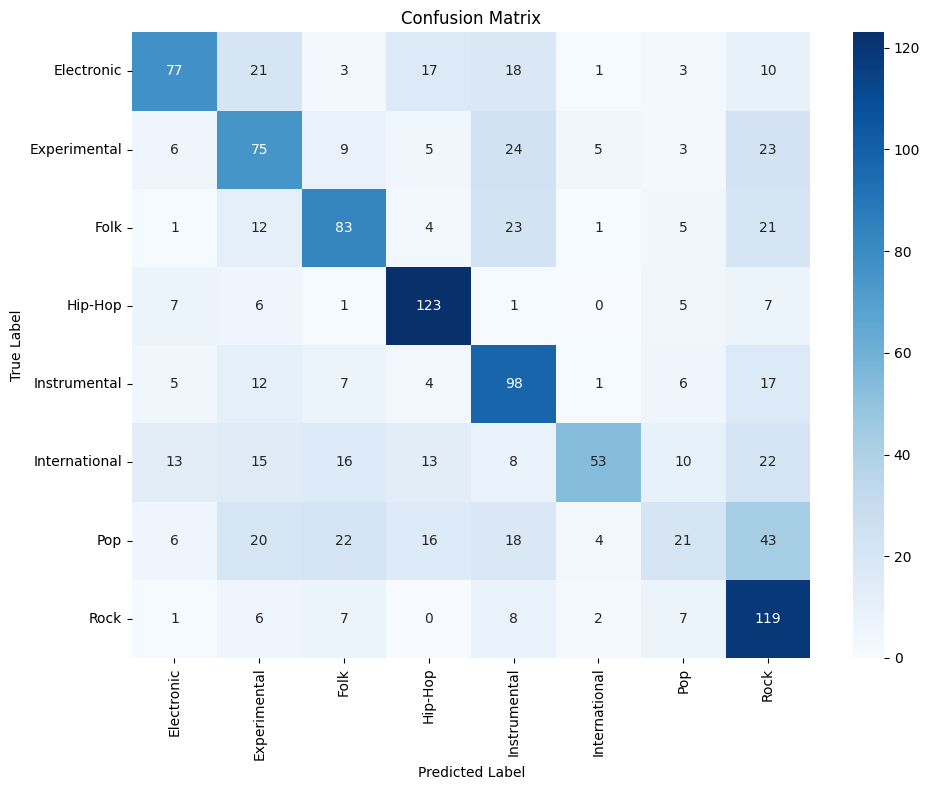

In [ ]:
evaluate_model(model, test_loader, class_names, device)

# LLM

In [ ]:
import librosa
import numpy as np
import torch

def preprocess_audio(file_path, sr=22050, duration=30.0, n_mels=128, expected_shape=(128, 128)):
    y, sr = librosa.load(file_path, sr=sr, duration=duration)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Resize to expected shape
    if mel_spec_db.shape[1] < expected_shape[1]:
        pad_width = expected_shape[1] - mel_spec_db.shape[1]
        mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, pad_width)), mode='constant')
    elif mel_spec_db.shape[1] > expected_shape[1]:
        mel_spec_db = mel_spec_db[:, :expected_shape[1]]

    mel_spec_db = (mel_spec_db - mel_spec_db.min()) / (mel_spec_db.max() - mel_spec_db.min() + 1e-6)
    tensor = torch.tensor(mel_spec_db, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # shape: (1, 1, H, W)
    return tensor


In [ ]:
def predict_genre(model, audio_tensor, device, class_names):
    model.eval()
    audio_tensor = audio_tensor.to(device)
    with torch.no_grad():
        output = model(audio_tensor)
        predicted_idx = output.argmax(1).item()
        confidence = torch.softmax(output, dim=1)[0][predicted_idx].item()
    return class_names[predicted_idx], confidence, output.squeeze().cpu().numpy()


In [ ]:
def create_prompt_from_activations(logits, class_names):
    top_indices = np.argsort(logits)[-3:][::-1]
    top_classes = [(class_names[i], logits[i]) for i in top_indices]
    prompt = "The model detected high activation for the following genres:\n"
    for genre, score in top_classes:
        prompt += f"- {genre} with activation score {score:.2f}\n"
    prompt += "Explain why this genre might be a good match for the uploaded audio."
    return prompt


In [ ]:
from openai import OpenAI

def generate_explanation(prompt, openai_api_key):
    client = OpenAI(api_key=openai_api_key)
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content


In [ ]:
audio_tensor = preprocess_audio("/content/fma_small/001/001039.mp3")


In [ ]:
# Assuming you have a file_path, trained model, and class_names list
audio_tensor = preprocess_audio("/content/fma_small/001/001039.mp3")
predicted_genre, confidence, logits = predict_genre(model, audio_tensor, device, class_names)
print(f"Predicted Genre: {predicted_genre} (Confidence: {confidence:.2f})")

prompt = create_prompt_from_activations(logits, class_names)
explanation = generate_explanation(prompt, openai_api_key=" enter your key here")


Predicted Genre: Rock (Confidence: 0.95)
LLM Explanation:
The song exhibits distorted electric guitar riffs, a strong 
backbeat from the drums, and energetic vocal delivery  all of 
which are hallmarks of Rock music. The intensity and 
instrumentation suggest a classic or alternative rock style, 
making Rock the most likely genre.
